In [66]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
color = sns.color_palette()

In [67]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
print('train size:', train.shape )
print('test size:', test.shape )

train size: (1143, 75)
test size: (286, 75)


In [68]:
train.head()

,surveyid,village,survey_date,femaleres,age,married,children,hhsize,edu,hh_children,...,given_mpesa,amount_given_mpesa,received_mpesa,amount_received_mpesa,net_mpesa,saved_mpesa,amount_saved_mpesa,early_survey,depressed,day_of_week
0,926,91,23-Nov-61,1,28.0,1,4,6,10,0,...,0,0.0,0,0.000000,0.000000,1,0.000000,0,0,5
1,747,57,24-Oct-61,1,23.0,1,3,5,8,0,...,0,0.0,1,4.804611,4.804611,0,0.000000,0,1,3
2,1190,115,05-Oct-61,1,22.0,1,3,5,9,0,...,0,0.0,0,8.007685,8.007685,1,0.000000,0,0,5
3,1065,97,23-Sep-61,1,27.0,1,2,4,10,2,...,0,0.0,0,0.000000,0.000000,1,1.249199,0,0,0
4,806,42,12-Sep-61,0,59.0,0,4,6,10,4,...,0,0.0,0,0.000000,0.000000,0,0.000000,0,0,3


In [69]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 75 columns):
surveyid                   1143 non-null int64
village                    1143 non-null int64
survey_date                1143 non-null object
femaleres                  1143 non-null int64
age                        1143 non-null float64
married                    1143 non-null int64
children                   1143 non-null int64
hhsize                     1143 non-null int64
edu                        1143 non-null int64
hh_children                1143 non-null int64
hh_totalmembers            809 non-null float64
cons_nondurable            1143 non-null float64
asset_livestock            1143 non-null float64
asset_durable              1143 non-null float64
asset_phone                1143 non-null float64
asset_savings              1143 non-null float64
asset_land_owned_total     1143 non-null float64
asset_niceroof             1143 non-null int64
cons_allfood               1143

In [70]:
test.head()

,surveyid,village,survey_date,femaleres,age,married,children,hhsize,edu,hh_children,...,given_mpesa,amount_given_mpesa,received_mpesa,amount_received_mpesa,net_mpesa,saved_mpesa,amount_saved_mpesa,early_survey,depressed,day_of_week
0,901,181,14-Nov-61,1,21,0,3,4,10,3,...,0,0.0,0,0.0,0.0,1,0.000000,0,0.0,3
1,498,47,18-Sep-61,1,44,1,6,8,6,6,...,0,0.0,0,0.0,0.0,0,0.000000,0,0.0,2
2,710,8,03-Sep-61,1,23,1,1,3,7,1,...,0,0.0,0,0.0,0.0,1,0.080077,0,0.0,1
3,433,25,01-Nov-60,1,67,0,0,1,1,0,...,0,0.0,0,0.0,0.0,0,0.000000,1,1.0,3
4,44,2,18-May-60,1,40,1,4,6,7,4,...,0,0.0,0,0.0,0.0,0,0.000000,1,NaN,4


In [71]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286 entries, 0 to 285
Data columns (total 75 columns):
surveyid                   286 non-null int64
village                    286 non-null int64
survey_date                286 non-null object
femaleres                  286 non-null int64
age                        285 non-null object
married                    286 non-null int64
children                   286 non-null int64
hhsize                     286 non-null int64
edu                        286 non-null int64
hh_children                286 non-null int64
hh_totalmembers            196 non-null float64
cons_nondurable            286 non-null float64
asset_livestock            286 non-null float64
asset_durable              286 non-null float64
asset_phone                286 non-null float64
asset_savings              286 non-null float64
asset_land_owned_total     286 non-null float64
asset_niceroof             286 non-null int64
cons_allfood               286 non-null float64
con

In [72]:
train.describe()

,surveyid,village,femaleres,age,married,children,hhsize,edu,hh_children,hh_totalmembers,...,given_mpesa,amount_given_mpesa,received_mpesa,amount_received_mpesa,net_mpesa,saved_mpesa,amount_saved_mpesa,early_survey,depressed,day_of_week
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,809.000000,...,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,715.927384,76.409449,0.916885,34.537270,0.772528,2.860017,4.869641,8.735783,2.018373,4.906057,...,0.015748,0.553462,0.066492,3.564576,3.011114,0.188976,2.269096,0.097988,0.168854,3.295713
std,415.694525,66.788138,0.276176,13.742107,0.419383,1.846946,2.121852,2.867202,2.016702,2.099287,...,0.124554,6.489140,0.249249,24.950902,25.840639,0.391661,19.676268,0.297428,0.374787,1.684910
min,1.000000,1.000000,0.000000,17.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,-160.153700,0.000000,0.000000,0.000000,0.000000,0.000000
25%,351.500000,23.000000,1.000000,24.000000,1.000000,2.000000,3.000000,8.000000,0.000000,3.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,717.000000,57.000000,1.000000,30.000000,1.000000,3.000000,5.000000,9.000000,2.000000,5.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
75%,1078.500000,105.500000,1.000000,41.000000,1.000000,4.000000,6.000000,10.000000,3.000000,6.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000
max,1429.000000,292.000000,1.000000,91.000000,1.000000,10.000000,12.000000,19.000000,10.000000,12.000000,...,1.000000,160.153700,1.000000,352.338130,352.338130,1.000000,488.468780,1.000000,1.000000,6.000000


In [73]:
ntrain = train.shape[0]
ntest = test.shape[0]
fulldata = pd.concat((train, test)).reset_index(drop = 'true')
print(ntrain , ntest, 'fulldata size:', fulldata.shape)

1143 286 fulldata size: (1429, 75)


In [74]:
fulldata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1429 entries, 0 to 1428
Data columns (total 75 columns):
surveyid                   1429 non-null int64
village                    1429 non-null int64
survey_date                1429 non-null object
femaleres                  1429 non-null int64
age                        1428 non-null object
married                    1429 non-null int64
children                   1429 non-null int64
hhsize                     1429 non-null int64
edu                        1429 non-null int64
hh_children                1429 non-null int64
hh_totalmembers            1005 non-null float64
cons_nondurable            1429 non-null float64
asset_livestock            1429 non-null float64
asset_durable              1429 non-null float64
asset_phone                1429 non-null float64
asset_savings              1429 non-null float64
asset_land_owned_total     1429 non-null float64
asset_niceroof             1429 non-null int64
cons_allfood               1429

the feature hhsize and hh_totalmembers are the same but hh_totalmembers has missing values so its okay to drop it

In [75]:
fulldata.drop(axis = 1, columns = ['hh_totalmembers','med_expenses_sp_ep'],  inplace = True)

dealing with missing value

In [76]:
fulldata.drop([ 'hh_children', 
       'cons_nondurable', 'asset_livestock', 'asset_durable', 'asset_phone',
       'asset_savings', 'asset_land_owned_total', 'asset_niceroof',
       'cons_allfood', 'cons_ownfood', 'cons_alcohol', 'cons_tobacco',
        'cons_med_children','med_expenses_hh_ep',
        'med_expenses_child_ep',
       'med_portion_sickinjured', 'med_port_sick_child', 'med_afford_port',
       'med_sickdays_hhave', 'med_healthconsult',  'med_u5_deaths', 'ed_expenses', 'ed_expenses_perkid',
       'ed_schoolattend', 'ed_sch_missedpc', 'ed_work_act_pc'
          ,'fs_chskipm_often','fs_chwholed_often','fs_meat','fs_enoughtom','fs_sleephun'], axis = 1, inplace = True)
#datasets = datasets.fillna(method='ffill')

In [77]:
s = fulldata[fulldata.drop(axis = 1, columns = 'depressed').isnull().any(axis = 1)]
s

,surveyid,village,survey_date,femaleres,age,married,children,hhsize,edu,cons_med_total,...,given_mpesa,amount_given_mpesa,received_mpesa,amount_received_mpesa,net_mpesa,saved_mpesa,amount_saved_mpesa,early_survey,depressed,day_of_week
1178,101,8,17-Sep-61,1,NaN,0,0,1,1,0.0,...,0,0.0,1,24.023054,24.023054,0,0.0,0,NaN,1


In [78]:
fulldata.loc[fulldata['age'] == '.d']

,surveyid,village,survey_date,femaleres,age,married,children,hhsize,edu,cons_med_total,...,given_mpesa,amount_given_mpesa,received_mpesa,amount_received_mpesa,net_mpesa,saved_mpesa,amount_saved_mpesa,early_survey,depressed,day_of_week
1224,490,49,12-Sep-61,1,.d,0,0,1,1,0.0,...,0,0.0,0,0.0,0.0,0,0.0,0,NaN,3


In [79]:
fulldata.replace('.d', 0, inplace = True)

In [80]:
fulldata.loc[fulldata['age'] == '.d']

,surveyid,village,survey_date,femaleres,age,married,children,hhsize,edu,cons_med_total,...,given_mpesa,amount_given_mpesa,received_mpesa,amount_received_mpesa,net_mpesa,saved_mpesa,amount_saved_mpesa,early_survey,depressed,day_of_week


In [81]:
fulldata['age'].fillna(0,  inplace = True)

In [82]:
fulldata['age'] = fulldata['age'].astype('float64')

In [83]:
fulldata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1429 entries, 0 to 1428
Data columns (total 42 columns):
surveyid                 1429 non-null int64
village                  1429 non-null int64
survey_date              1429 non-null object
femaleres                1429 non-null int64
age                      1429 non-null float64
married                  1429 non-null int64
children                 1429 non-null int64
hhsize                   1429 non-null int64
edu                      1429 non-null int64
cons_med_total           1429 non-null float64
cons_ed                  1429 non-null float64
cons_social              1429 non-null float64
cons_other               1429 non-null float64
ent_wagelabor            1429 non-null int64
ent_ownfarm              1429 non-null int64
ent_business             1429 non-null int64
ent_nonagbusiness        1429 non-null int64
ent_employees            1429 non-null int64
ent_nonag_revenue        1429 non-null float64
ent_nonag_flowcost       

In [84]:
fulldata['age'].replace(0, fulldata['age'].mean(), inplace = True)

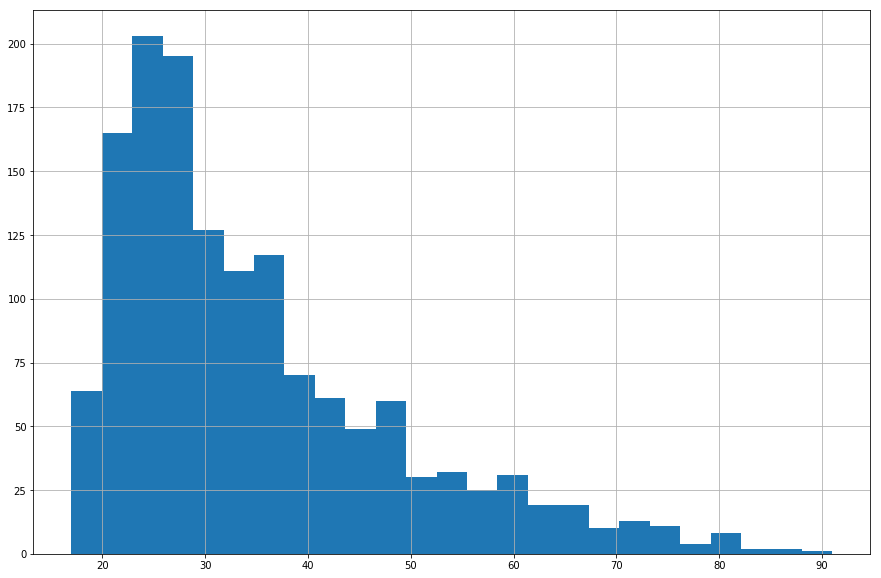

In [85]:
hist_age = fulldata.age.hist(bins=25,figsize=[15,10])

In [86]:
fulldata['age_bin'] = np.array(np.floor(np.array(fulldata['age']) / 10.))

In [87]:
fulldata.drop(axis = 1, columns = 'surveyid', inplace = True)

dealing with the vilage feature

fulldata.village.value_counts()

village is seen as a categorical data in the sense that some people could be from the same village 
so its either i drop it or find a way to encode it... so lets try droping it first

the feature hhsize and hh_totalmembers are the same but hh_totalmembers has missing values so its okay to drop it

In [23]:
#fulldata.drop(axis = 1, columns = 'village', inplace = True)

In [88]:
fulldata.drop(axis = 1, columns = 'survey_date', inplace = True)

so our model will basically predict better for femail than for male so lets check if our test set is mostly female

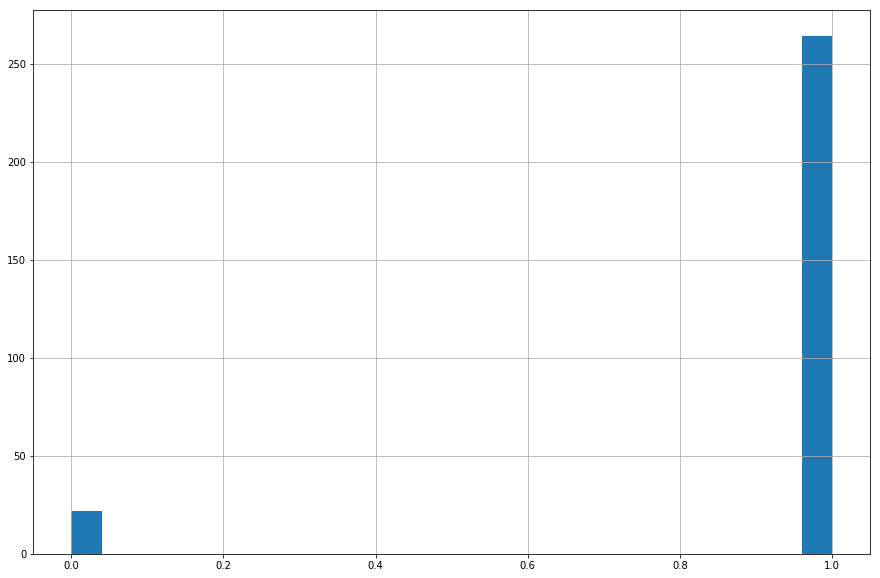

In [35]:
hist_age = test.femaleres.hist(bins=25,figsize=[15,10])

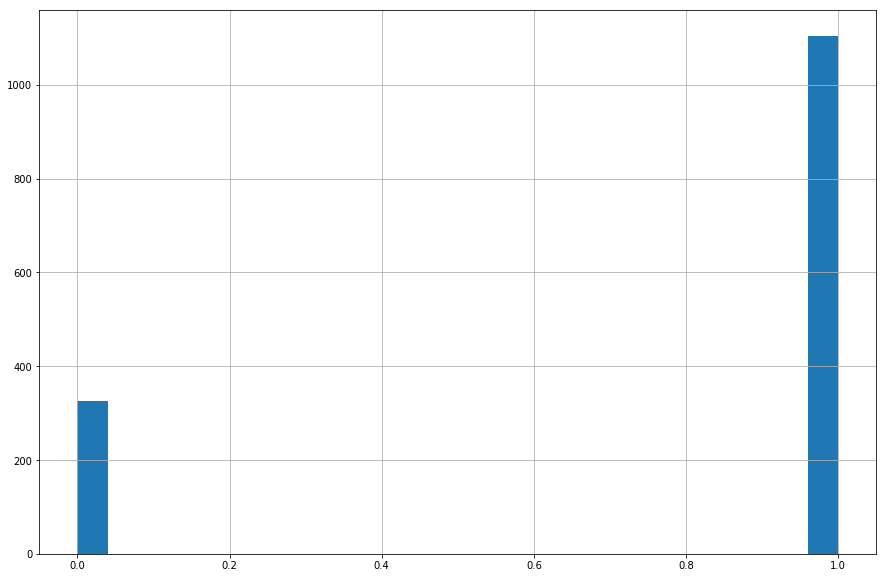

In [36]:
hist_age = fulldata.married.hist(bins=25,figsize=[15,10])

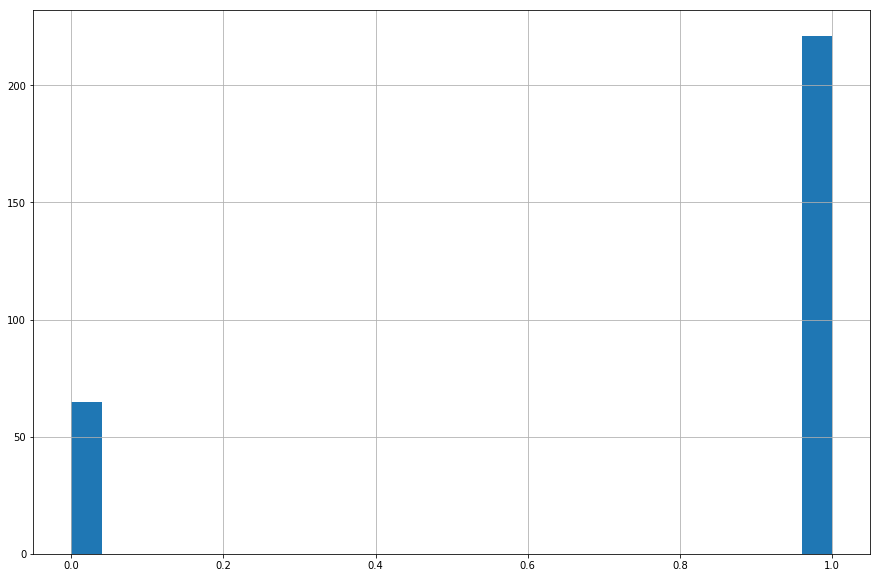

In [37]:
hist_age = test.married.hist(bins=25,figsize=[15,10])

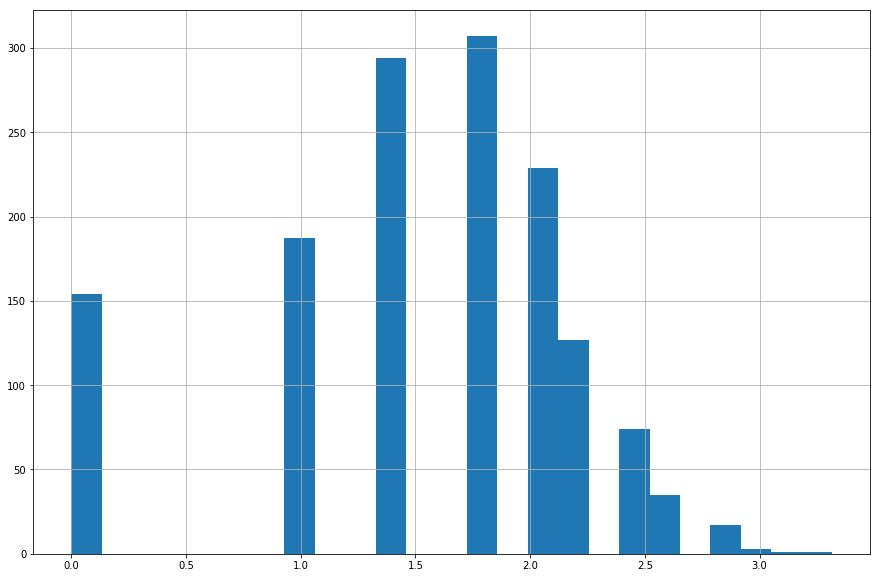

In [195]:
root_children = fulldata.children.apply(np.sqrt)
hist_sqrt_children = root_children.hist(bins=25,figsize=[15,10])


In [24]:
fulldata['children'] = root_children

NameError: name 'root_children' is not defined

In [89]:
ready_train = fulldata[:ntrain]
ready_test = fulldata[ntrain:]
ready_train.dropna(inplace=True)

C:\Users\olugbenle enoch\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [90]:
ready_train.head()

,village,femaleres,age,married,children,hhsize,edu,cons_med_total,cons_ed,cons_social,...,amount_given_mpesa,received_mpesa,amount_received_mpesa,net_mpesa,saved_mpesa,amount_saved_mpesa,early_survey,depressed,day_of_week,age_bin
0,91,1,28.0,1,4,6,10,0.000000,0.000000,0.000000,...,0.0,0,0.000000,0.000000,1,0.000000,0,0.0,5,2.0
1,57,1,23.0,1,3,5,8,0.000000,0.000000,0.000000,...,0.0,1,4.804611,4.804611,0,0.000000,0,1.0,3,2.0
2,115,1,22.0,1,3,5,9,0.000000,0.000000,0.000000,...,0.0,0,8.007685,8.007685,1,0.000000,0,0.0,5,2.0
3,97,1,27.0,1,2,4,10,4.163996,1.681614,39.771500,...,0.0,0,0.000000,0.000000,1,1.249199,0,0.0,0,2.0
4,42,0,59.0,0,4,6,10,0.800768,2.268844,8.087762,...,0.0,0,0.000000,0.000000,0,0.000000,0,0.0,3,5.0


In [91]:
X= ready_train.drop(axis = 1, columns = 'depressed')
y = train.depressed
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [80]:
from sklearn.utils import resample
A = pd.concat([X_train, y_train], axis=1)
not_P = A[A.depressed==0]
P = A[A.depressed==1]
P_upsampled = resample(P, replace=True, n_samples=len(not_P), random_state=27)
upsampled = pd.concat([not_P, P_upsampled])
upsampled.depressed.value_counts()

1.0    644
0.0    644
Name: depressed, dtype: int64

In [92]:
from sklearn.linear_model import LogisticRegression
model1 = LogisticRegression(penalty='l1')
model1.fit(X, y) 
from sklearn.metrics import f1_score 
pred = model1.predict(X_test)
f1_score(pred,y_test)

C:\Users\olugbenle enoch\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.0

In [43]:
from sklearn import metrics

print("Accuracy: ", metrics.accuracy_score(y, predd))
print("Precision: ", metrics.precision_score(y, predd))
print("Recall: ", metrics.recall_score(y, predd))

Accuracy:  0.9457567804024497
Precision:  0.8875739644970414
Recall:  0.7772020725388601


In [93]:
# Fitting Random Forest Classification to the Training set
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 3, criterion = 'entropy', random_state = 0)
classifier.fit(X, y)
predd = classifier.predict(X)
f1_score(predd,y)

0.8507042253521128

In [94]:
from sklearn.metrics import accuracy_score
1 - accuracy_score(predd,y)

0.046369203849518814

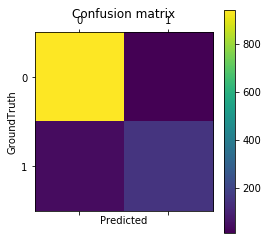

[[939  11]
 [ 42 151]]


In [95]:
# Plot confusion Matrix
def conftable(test,pred, imagename):
    confmatrix= metrics.confusion_matrix(y, predd)
    plt.matshow(confmatrix)
    plt.title('Confusion matrix')
    plt.colorbar()
    plt.ylabel('GroundTruth')
    plt.xlabel('Predicted')
    plt.savefig(imagename)
    
    plt.show()
    print(confmatrix)
conftable(y,predd,"conf")

In [96]:

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier

In [97]:
model11 = GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=90,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [98]:
model11.fit(X, y)
yg = model11.predict(X_test)
f1_score(yg,y_test)

0.56

In [99]:
import xgboost as xgb
from xgboost import XGBClassifier
# fit model no training data
model33 = XGBClassifier(min_child_weight = 3, gamma = 0.5, subsample = 0.9, colsample_bytree = 0.6, max_depth = 3, learning_rate=1, reg_lambda = 1 )
model33.fit(X, y)
y_pred = model33.predict(X_test)
f1_score(y_test,y_pred)

0.9343065693430657

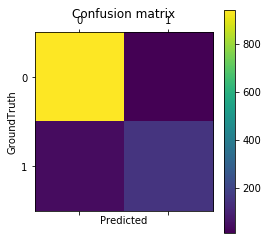

[[939  11]
 [ 42 151]]


In [100]:
from sklearn.metrics import accuracy_score
1 - accuracy_score(y_pred,y_test)
conftable(y_test,y,"conf")

In [101]:
from sklearn.metrics import accuracy_score
1 - accuracy_score(y_pred,y_test)

0.023809523809523836

In [102]:
ready_test.head(10)

,village,femaleres,age,married,children,hhsize,edu,cons_med_total,cons_ed,cons_social,...,amount_given_mpesa,received_mpesa,amount_received_mpesa,net_mpesa,saved_mpesa,amount_saved_mpesa,early_survey,depressed,day_of_week,age_bin
1143,181,1,21.000000,0,3,4,10,0.0,0.000000,4.003842,...,0.0,0,0.0,0.0,1,0.000000,0,0.0,3,2.0
1144,47,1,44.000000,1,6,8,6,0.0,1.521460,0.000000,...,0.0,0,0.0,0.0,0,0.000000,0,0.0,2,4.0
1145,8,1,23.000000,1,1,3,7,0.0,0.720692,13.452910,...,0.0,0,0.0,0.0,1,0.080077,0,0.0,1,2.0
1146,25,1,67.000000,0,0,1,1,0.0,0.000000,2.535767,...,0.0,0,0.0,0.0,0,0.000000,1,1.0,3,6.0
1147,2,1,40.000000,1,4,6,7,0.0,2.275517,0.000000,...,0.0,0,0.0,0.0,0,0.000000,1,NaN,4,4.0
1148,15,1,54.700001,1,2,4,4,0.0,0.533846,2.509075,...,0.0,0,0.0,0.0,0,0.000000,0,NaN,6,5.0
1149,52,1,25.000000,1,6,8,6,0.0,1.601537,1.734999,...,0.0,0,0.0,0.0,0,0.000000,0,NaN,1,2.0
1150,28,1,43.000000,0,6,8,9,0.0,4.857996,7.874223,...,0.0,0,0.0,0.0,0,0.000000,0,NaN,2,4.0
1151,279,1,23.000000,1,2,4,9,0.0,0.000000,0.000000,...,0.0,0,0.0,0.0,1,9.609222,0,NaN,4,2.0
1152,96,1,22.000000,1,2,4,7,0.0,0.000000,0.000000,...,0.0,0,0.0,0.0,0,0.000000,0,NaN,1,2.0


In [103]:
predicted = model11.predict(ready_test.drop(['depressed'], axis = 1))

In [104]:
d = pd.DataFrame(predicted)

In [105]:
sub = pd.read_csv('sample_submission.csv')

In [106]:
sub['depressed'] = d

In [108]:
sub.to_csv('togodbetheglory4.csv',index = False)